Import libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

Load files

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0],  squeeze=True, date_parser=parser) #index_col=0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [ ]:
series

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


In [ ]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


Check for null values

In [ ]:
series.isnull().sum()

Month    0
Sales    0
dtype: int64

Chart

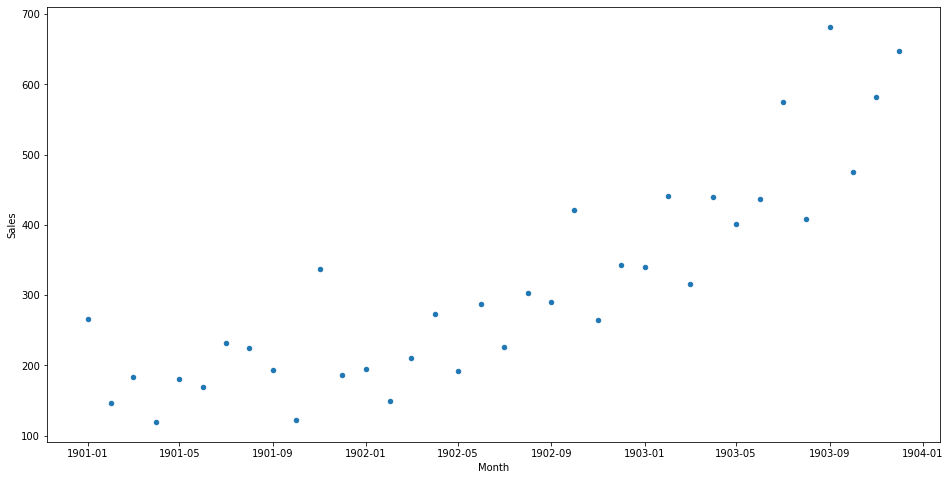

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
series.plot(kind='scatter', x='Month', y='Sales', ax=axs, figsize=(16, 8))

Define training and validation dates

In [ ]:
series.Month = series.Month.astype(str)
series.index = series.Month
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [ ]:
series['Timestamp'] = pd.to_datetime(series.Month,format='%Y-%m') 
series.index = series.Timestamp 
# Converting to monthly mean 
monthly = series.resample('M').mean()
series

,Month,Sales,Timestamp
Timestamp,,,
1901-01-01,1901-01-01,266.0,1901-01-01
1901-02-01,1901-02-01,145.9,1901-02-01
1901-03-01,1901-03-01,183.1,1901-03-01
1901-04-01,1901-04-01,119.3,1901-04-01
1901-05-01,1901-05-01,180.3,1901-05-01
1901-06-01,1901-06-01,168.5,1901-06-01
1901-07-01,1901-07-01,231.8,1901-07-01
1901-08-01,1901-08-01,224.5,1901-08-01
1901-09-01,1901-09-01,192.8,1901-09-01


In [ ]:
train=series.loc['1901-01-01':'1903-07-30'] 
valid=series.loc['1903-08-01':'1903-12-31']

In [ ]:
train

,Month,Sales,Timestamp
Timestamp,,,
1901-01-01,1901-01-01,266.0,1901-01-01
1901-02-01,1901-02-01,145.9,1901-02-01
1901-03-01,1901-03-01,183.1,1901-03-01
1901-04-01,1901-04-01,119.3,1901-04-01
1901-05-01,1901-05-01,180.3,1901-05-01
1901-06-01,1901-06-01,168.5,1901-06-01
1901-07-01,1901-07-01,231.8,1901-07-01
1901-08-01,1901-08-01,224.5,1901-08-01
1901-09-01,1901-09-01,192.8,1901-09-01


In [ ]:
valid

,Month,Sales,Timestamp
Timestamp,,,
1903-08-01,1903-08-01,407.6,1903-08-01
1903-09-01,1903-09-01,682.0,1903-09-01
1903-10-01,1903-10-01,475.3,1903-10-01
1903-11-01,1903-11-01,581.3,1903-11-01
1903-12-01,1903-12-01,646.9,1903-12-01


Graphics

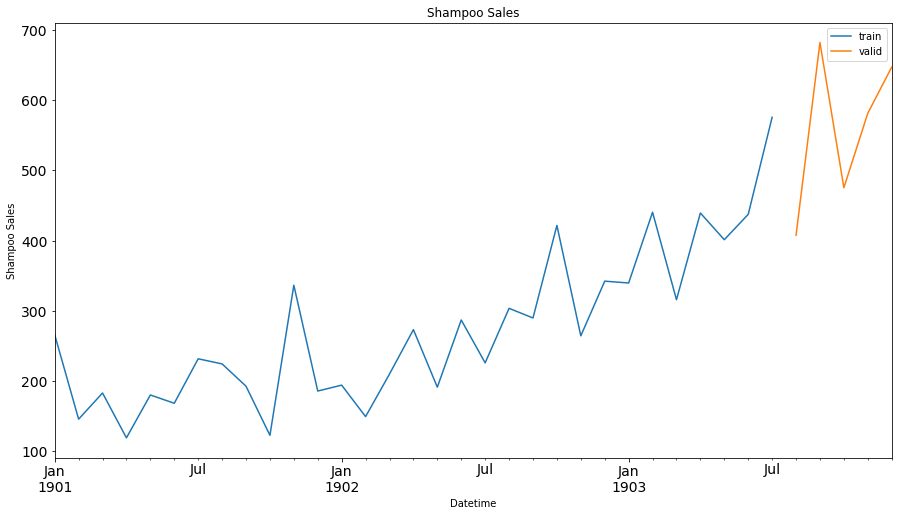

In [ ]:
train['Sales'].plot(figsize=(15,8), title= 'Shampoo Sales', fontsize=14, label='train') 
valid['Sales'].plot(figsize=(15,8), title= 'Shampoo Sales', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Shampoo Sales") 
plt.legend(loc='best') 
plt.show()

Naive

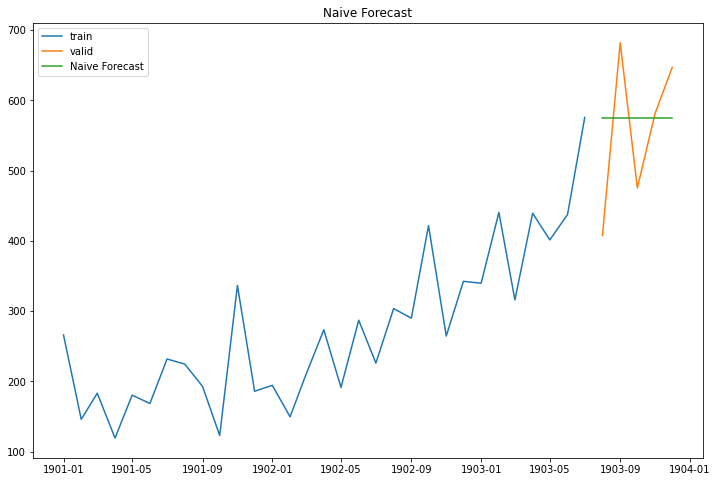

In [ ]:
dd= np.asarray(train['Sales'])
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Sales'], label='train') 
plt.plot(valid.index,valid['Sales'], label='valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid['Sales'], y_hat.naive)
print(rms)

10940.859999999997


In [ ]:
df_val=pd.DataFrame({'Actual': valid['Sales'].values, 'Predicted': y_hat.naive.values})
df_val

,Actual,Predicted
0,407.6,575.5
1,682.0,575.5
2,475.3,575.5
3,581.3,575.5
4,646.9,575.5


AutoRegression (AR)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

# fit model
model =AR(train.Sales)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)
print(yhat)

1903-08-01    474.300936
1903-09-01    545.370857
1903-10-01    560.341058
1903-11-01    678.006917
1903-12-01    636.246828
Freq: MS, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
sales = valid.Sales
sales.ndim

1

In [ ]:
df_val=pd.DataFrame({'Actual': sales, 'Predicted': yhat})
df_val

,Actual,Predicted
1903-08-01,407.6,474.300936
1903-09-01,682.0,545.370857
1903-10-01,475.3,560.341058
1903-11-01,581.3,678.006917
1903-12-01,646.9,636.246828


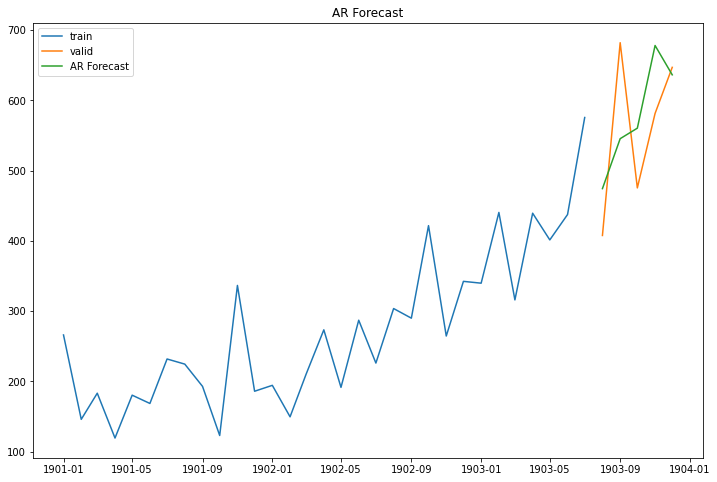

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Sales'], label='train') 
plt.plot(valid.index,valid['Sales'], label='valid') 
plt.plot(yhat, label='AR Forecast') 
plt.legend(loc='best') 
plt.title("AR Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid['Sales'], yhat)
print(rms)

7962.847364029985


Moving Average (MA)

In [ ]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model =ARMA(train.Sales, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)
print(yhat)

1903-08-01    362.573945
1903-09-01    276.034044
1903-10-01    276.034044
1903-11-01    276.034044
1903-12-01    276.034044
Freq: MS, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
df_val=pd.DataFrame({'Actual': valid['Sales'].values, 'Predicted': yhat})
df_val

,Actual,Predicted
1903-08-01,407.6,362.573945
1903-09-01,682.0,276.034044
1903-10-01,475.3,276.034044
1903-11-01,581.3,276.034044
1903-12-01,646.9,276.034044


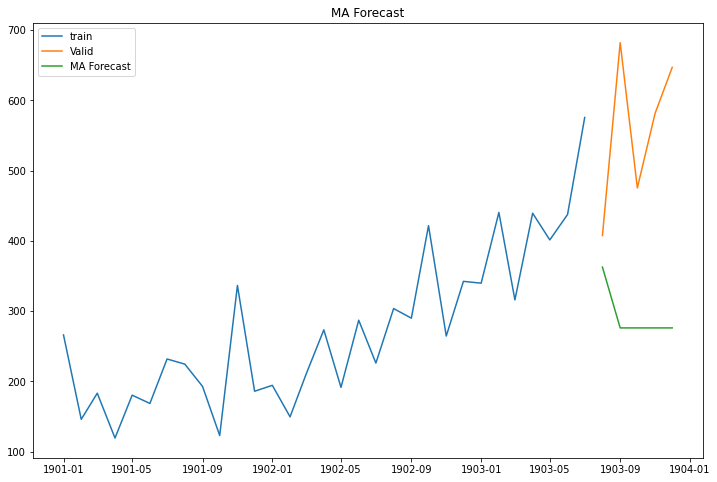

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Sales'], label='train') 
plt.plot(valid.index,valid['Sales'], label='Valid') 
plt.plot(yhat, label='MA Forecast') 
plt.legend(loc='best') 
plt.title("MA Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = (mean_squared_error(valid['Sales'], yhat))
print(rms)

87454.2971232098


Simple Exponential Smoothing (SES)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model =SimpleExpSmoothing(train.Sales)
model_fit = model.fit(smoothing_level=0.6,optimized=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])
print(yhat)

1903-08-01    514.599498
1903-09-01    514.599498
1903-10-01    514.599498
1903-11-01    514.599498
1903-12-01    514.599498
Freq: MS, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
df_val=pd.DataFrame({'Actual': valid['Sales'].values, 'Predicted': yhat})
df_val

,Actual,Predicted
1903-08-01,407.6,514.599498
1903-09-01,682.0,514.599498
1903-10-01,475.3,514.599498
1903-11-01,581.3,514.599498
1903-12-01,646.9,514.599498


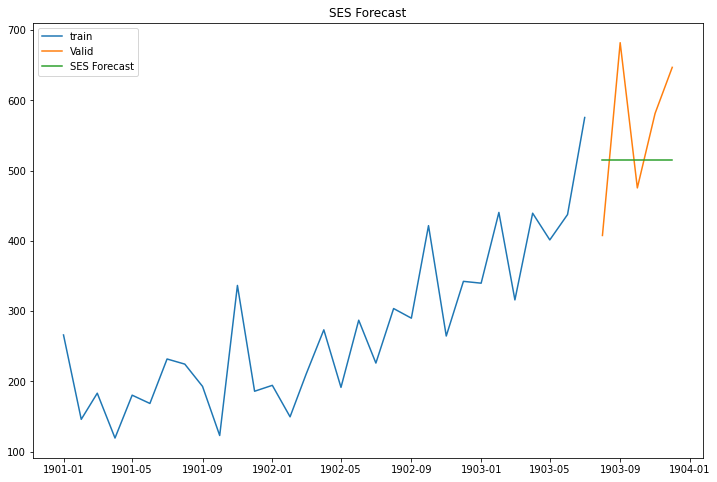

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Sales'], label='train') 
plt.plot(valid.index,valid['Sales'], label='Valid') 
plt.plot(yhat, label='SES Forecast') 
plt.legend(loc='best') 
plt.title("SES Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid['Sales'], yhat)
print(rms)

12593.730174805378


Holt Winters Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(train.Sales)
model_fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])
print(yhat)

1903-08-01    451.243452
1903-09-01    451.243452
1903-10-01    451.243452
1903-11-01    451.243452
1903-12-01    451.243452
Freq: MS, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


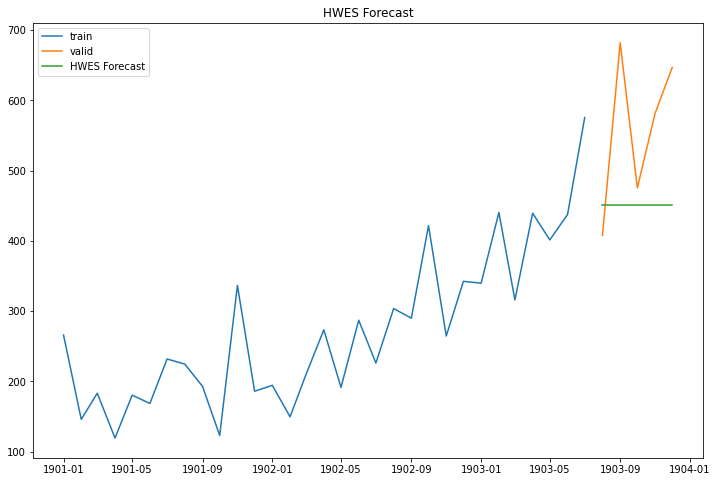

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Sales'], label='train') 
plt.plot(valid.index,valid['Sales'], label='valid') 
plt.plot(yhat, label='HWES Forecast') 
plt.legend(loc='best') 
plt.title("HWES Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid['Sales'], yhat)
print(rms)

22185.648611470482
